In [27]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

#Generate training data

## first generate 10 cluster means for each class:

(-4, 4)

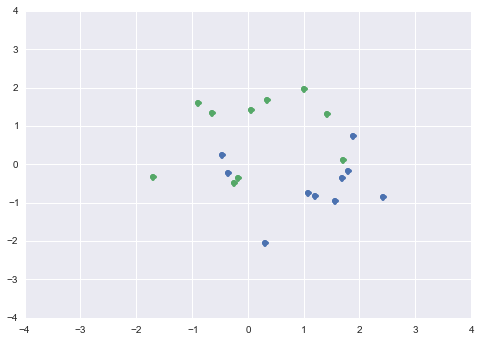

In [28]:
cov = np.identity(2)

#generate blue class:
#    generate m_1, ..., m_10 from N((1,0), I)
mean = [1,0]
blue_m = np.random.multivariate_normal(mean,cov,10)

#generate green class:
#    generate m_1, ..., m_10 from N((0,1), I)
mean = [0,1.5]
green_m = np.random.multivariate_normal(mean,cov,10)

plt.plot(green_m[:,0],green_m[:,1], 'o', color='g')
plt.plot(blue_m[:,0],blue_m[:,1], 'o', color='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

## now generate the training data based on the centers

(-4, 4)

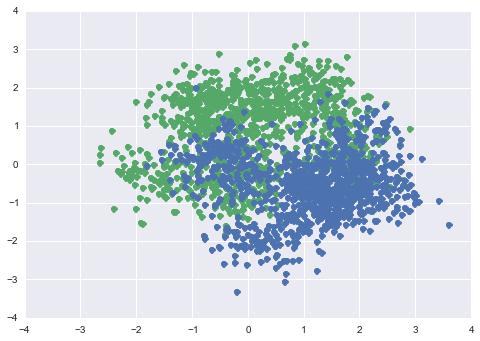

In [29]:
n=1000
#greens:
greens = []
for i in range(n):
    cur_mean = green_m[np.random.randint(0,10)]
    
    new_point = np.random.multivariate_normal(cur_mean,cov/5,1)
    #print new_point
    greens.append(new_point[0])
    
greens = np.array(greens)
plt.plot(greens[:,0],greens[:,1], 'o', color='g')

blues = []
for i in range(n):
    cur_mean = blue_m[np.random.randint(0,10)]
    
    new_point = np.random.multivariate_normal(cur_mean,cov/5,1)
    #print new_point
    blues.append(new_point[0])
    
blues = np.array(blues)
plt.plot(blues[:,0],blues[:,1], 'o', color='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#LINEAR REGRESSION

###reshape the training data

In [30]:
N=2*n
x_train = np.append(blues, greens)
x_train = x_train.reshape((N,2))


y_train = np.append(np.zeros(n), np.ones(n)).reshape((N,1))

##generate some test data

In [31]:
x_test = np.array([0,0])
for x in np.linspace(-4, 4, 50):
    for y in np.linspace(-4, 4, 50):
        x_test = np.vstack((x_test, np.array([x,y])))
        


#SGDClassifier

In [32]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(loss="log", penalty="none", n_iter=100000)
SGD.fit(x_train, np.ravel(y_train))

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=100000, n_jobs=1,
       penalty='none', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [33]:
beta_SGD = SGD.coef_.T
print beta_SGD
print SGD.intercept_

[[-0.8793861 ]
 [ 1.57102206]]
[ 0.3168126]


In [34]:
y_testSGD = SGD.predict(x_test)

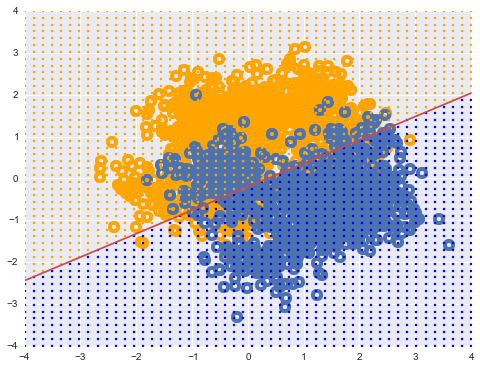

In [35]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)


#plot training data:
ax.plot(greens[:,0],greens[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='orange')
ax.plot(blues[:,0],blues[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#plot test data:
for x,y in zip(x_test, y_testSGD):
    if y<=0.5:
        ax.plot(x[0], x[1], '.', color='blue', markersize=5)
    else:
        ax.plot(x[0], x[1], '.', color='orange', markersize=5)
        
        
#plot the regression line

#b0 + b1x1 + b2x2 = 0
#b0 + b1(-4) + b2x2 = 0
# x2 = (4b1-b0)/b2
p1 = (4*beta_SGD[0]-SGD.intercept_)/beta_SGD[1]
#b0 + b1(4) + b2x2 = 0
# x2 = (-4b1-b0)/b2
p2 = (-4*beta_SGD[0]-SGD.intercept_)/beta_SGD[1]

#line = plt.Line2D([-4, p1], [4,p2])
#plt.show()
line = plt.Line2D([-4,4], [p1,p2], color='r')
ax.add_line(line)


In [43]:
from sklearn.linear_model import LogisticRegression

LGSTC = LogisticRegression(solver = "liblinear")
LGSTC.fit(x_train, np.ravel(y_train))
beta_LGSTC = LGSTC.coef_.T
y_testLogistic = LGSTC.predict(x_test)

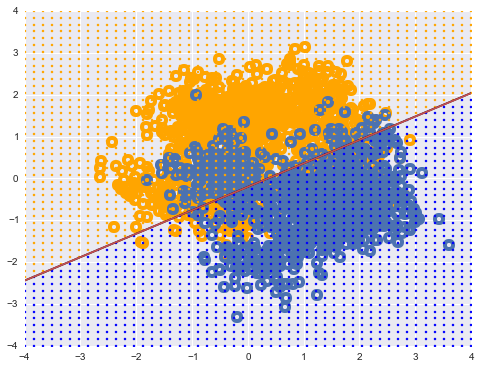

In [44]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)


#plot training data:
ax.plot(greens[:,0],greens[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='orange')
ax.plot(blues[:,0],blues[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#plot test data:
for x,y in zip(x_test, y_testLogistic):
    if y<=0.5:
        ax.plot(x[0], x[1], '.', color='blue', markersize=5)
    else:
        ax.plot(x[0], x[1], '.', color='orange', markersize=5)
        

#b0 + b1x1 + b2x2 = 0
#b0 + b1(-4) + b2x2 = 0
# x2 = (4b1-b0)/b2
p1 = (4*beta_LGSTC[0]-LGSTC.intercept_)/beta_LGSTC[1]
#b0 + b1(4) + b2x2 = 0
# x2 = (-4b1-b0)/b2
p2 = (-4*beta_LGSTC[0]-LGSTC.intercept_)/beta_LGSTC[1]

#line = plt.Line2D([-4, p1], [4,p2])
#plt.show()
line = plt.Line2D([-4,4], [p1,p2], color='black')
ax.add_line(line)



#plot the regression line

#b0 + b1x1 + b2x2 = 0
#b0 + b1(-4) + b2x2 = 0
# x2 = (4b1-b0)/b2
p1 = (4*beta_SGD[0]-SGD.intercept_)/beta_SGD[1]
#b0 + b1(4) + b2x2 = 0
# x2 = (-4b1-b0)/b2
p2 = (-4*beta_SGD[0]-SGD.intercept_)/beta_SGD[1]

#line = plt.Line2D([-4, p1], [4,p2])
#plt.show()
line = plt.Line2D([-4,4], [p1,p2], color='r')
ax.add_line(line)


In [47]:
from sklearn import linear_model
LREG = linear_model.LinearRegression()
LREG.fit(x_train, y_train)

beta_LREG = LREG.coef_.T
y_testLREG = LREG.predict(x_test)

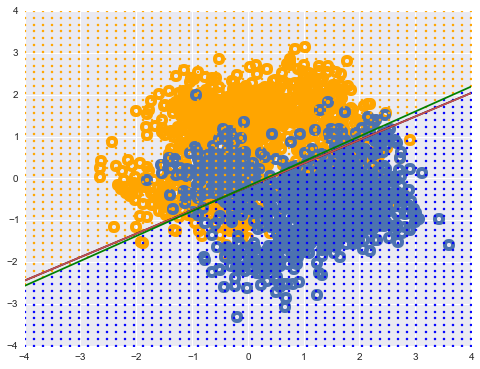

In [53]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)


#plot training data:
ax.plot(greens[:,0],greens[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='orange')
ax.plot(blues[:,0],blues[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#plot test data:
for x,y in zip(x_test, y_testLREG):
    if y<=0.5:
        ax.plot(x[0], x[1], '.', color='blue', markersize=5)
    else:
        ax.plot(x[0], x[1], '.', color='orange', markersize=5)
        

#b0 + b1x1 + b2x2 = 0
#b0 + b1(-4) + b2x2 = 0
# x2 = (4b1-b0)/b2
p1 = (4*beta_LGSTC[0]-LGSTC.intercept_)/beta_LGSTC[1]
#b0 + b1(4) + b2x2 = 0
# x2 = (-4b1-b0)/b2
p2 = (-4*beta_LGSTC[0]-LGSTC.intercept_)/beta_LGSTC[1]

#line = plt.Line2D([-4, p1], [4,p2])
#plt.show()
line = plt.Line2D([-4,4], [p1,p2], color='black')
ax.add_line(line)



#plot the regression line

#b0 + b1x1 + b2x2 = 0
#b0 + b1(-4) + b2x2 = 0
# x2 = (4b1-b0)/b2
p1 = (4*beta_SGD[0]-SGD.intercept_)/beta_SGD[1]
#b0 + b1(4) + b2x2 = 0
# x2 = (-4b1-b0)/b2
p2 = (-4*beta_SGD[0]-SGD.intercept_)/beta_SGD[1]

#line = plt.Line2D([-4, p1], [4,p2])
#plt.show()
line = plt.Line2D([-4,4], [p1,p2], color='r')
ax.add_line(line)


p1 = (0.5+4*beta_LREG[0]-LREG.intercept_)/beta_LREG[1]
#b0 + b1(4) + b2x2 = 0.5
# x2 = 0.5+(-4b1-b0)/b2
p2 = (0.5-4*beta_LREG[0]-LREG.intercept_)/beta_LREG[1]

#line = plt.Line2D([-4, p1], [4,p2])
#plt.show()
line = plt.Line2D([-4,4], [p1,p2], color='green')
ax.add_line(line)